<a href="https://colab.research.google.com/github/ReyhanehRazavi-99/Facial-Emotion-Recognition/blob/main/3different_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A1) Upload kaggle.json (Kaggle → Account → Create New API Token)
from google.colab import files
files.upload()  # choose kaggle.json

# A2) Install Kaggle CLI and place credentials
!pip -q install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Sanity check
!kaggle --version


Saving kaggle.json to kaggle.json
Kaggle API 1.7.4.5


In [ ]:
# Create a target folder and download there
!mkdir -p /content/fer2013plus
!kaggle datasets download -d subhaditya/fer2013plus -p /content/fer2013plus --unzip

# Inspect the contents
!ls -lah /content/fer2013plus


Dataset URL: https://www.kaggle.com/datasets/subhaditya/fer2013plus
License(s): unknown
  0% 0.00/132M [00:00<?, ?B/s]
100% 132M/132M [00:00<00:00, 1.70GB/s]
total 16K
drwxr-xr-x 3 root root 4.0K Nov 10 01:24 .
drwxr-xr-x 1 root root 4.0K Nov 10 01:23 ..
drwxr-xr-x 3 root root 4.0K Nov 10 01:23 fer2013plus
-rw-r--r-- 1 root root 1.8K Nov 10 01:24 ferplus_port.py


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Colab paths (primary) ---
base_path = "/content/fer2013plus/fer2013plus/fer2013"
train_path = os.path.join(base_path, "train")
test_path  = os.path.join(base_path, "test")

# Fallback to /content/fer2013plus if needed
if not (os.path.isdir(train_path) and os.path.isdir(test_path)):
    base_path = "/content/fer2013plus"
    train_path = os.path.join(base_path, "train")
    test_path  = os.path.join(base_path, "test")

assert os.path.isdir(train_path) and os.path.isdir(test_path), \
    f"Couldn't find train/test under {base_path}. Check your folders."

img_size   = (224, 224)
batch_size = 64

# Train (with augmentation) + virtual 20% validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='training', shuffle=True, seed=1337
)

val_gen = train_datagen.flow_from_directory(
    train_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False, seed=1337
)

test_gen = test_datagen.flow_from_directory(
    test_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

print("Classes:", train_gen.class_indices)


Found 22712 images belonging to 8 classes.
Found 5674 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.
Classes: {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happiness': 4, 'neutral': 5, 'sadness': 6, 'surprise': 7}


Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
Device: cuda


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


[Epoch 1] Train Loss: 1.4319  Train Acc: 0.4574  Val Acc: 0.5211


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.54it/s]


[Epoch 2] Train Loss: 1.3927  Train Acc: 0.4804  Val Acc: 0.4979


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


[Epoch 3] Train Loss: 1.3778  Train Acc: 0.4837  Val Acc: 0.5004


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


[Epoch 4] Train Loss: 1.3724  Train Acc: 0.4855  Val Acc: 0.5111


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.54it/s]


[Epoch 5] Train Loss: 1.3134  Train Acc: 0.5070  Val Acc: 0.5340


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


[Epoch 6] Train Loss: 1.3014  Train Acc: 0.5075  Val Acc: 0.5229


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.54it/s]


[Epoch 7] Train Loss: 1.2995  Train Acc: 0.5113  Val Acc: 0.5439


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.54it/s]


[Epoch 8] Train Loss: 1.2999  Train Acc: 0.5126  Val Acc: 0.5312


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


[Epoch 9] Train Loss: 1.3021  Train Acc: 0.5067  Val Acc: 0.5241


Eval (val): 100%|██████████| 89/89 [00:57<00:00,  1.54it/s]


[Epoch 10] Train Loss: 1.3063  Train Acc: 0.5036  Val Acc: 0.5516
Best Val Acc: 0.5516


Eval (Validation): 100%|██████████| 89/89 [00:58<00:00,  1.53it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 


Validation Accuracy: 0.5511
Validation Classification Report:
              precision    recall  f1-score   support

       anger     0.4471    0.1542    0.2293       493
    contempt     1.0000    0.0303    0.0588        33
     disgust     0.0000    0.0000    0.0000        38
        fear     0.5714    0.1231    0.2025       130
   happiness     0.5571    0.6326    0.5924      1505
     neutral     0.5519    0.7220    0.6256      2061
     sadness     0.4925    0.1866    0.2707       702
    surprise     0.5759    0.6503    0.6108       712

    accuracy                         0.5511      5674
   macro avg     0.5245    0.3124    0.3238      5674
weighted avg     0.5392    0.5511    0.5194      5674



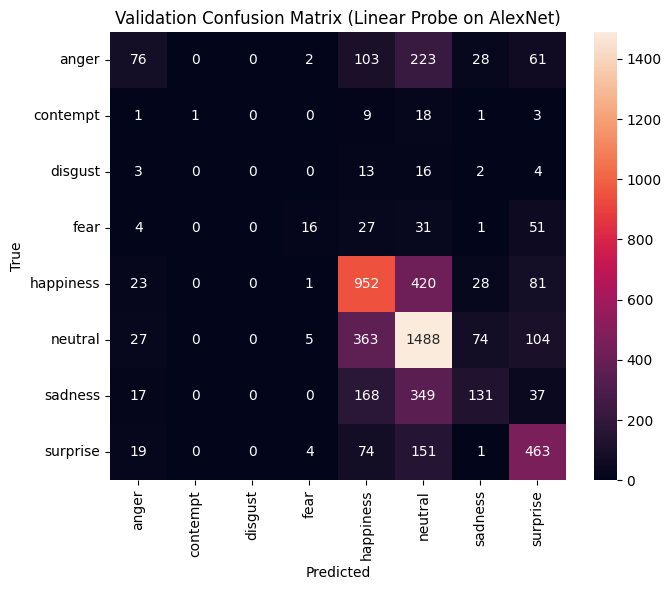

Eval (Test): 100%|██████████| 111/111 [00:08<00:00, 13.77it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",


Test Accuracy: 0.5411
Test Classification Report:
              precision    recall  f1-score   support

       anger     0.6019    0.1925    0.2918       644
    contempt     0.5000    0.0196    0.0377        51
     disgust     0.0000    0.0000    0.0000        57
        fear     0.0000    0.0000    0.0000       167
   happiness     0.5414    0.6262    0.5807      1827
     neutral     0.5138    0.8013    0.6261      2597
     sadness     0.5372    0.1180    0.1935       856
    surprise     0.7276    0.4333    0.5432       900

    accuracy                         0.5411      7099
   macro avg     0.4278    0.2739    0.2841      7099
weighted avg     0.5425    0.5411    0.4974      7099



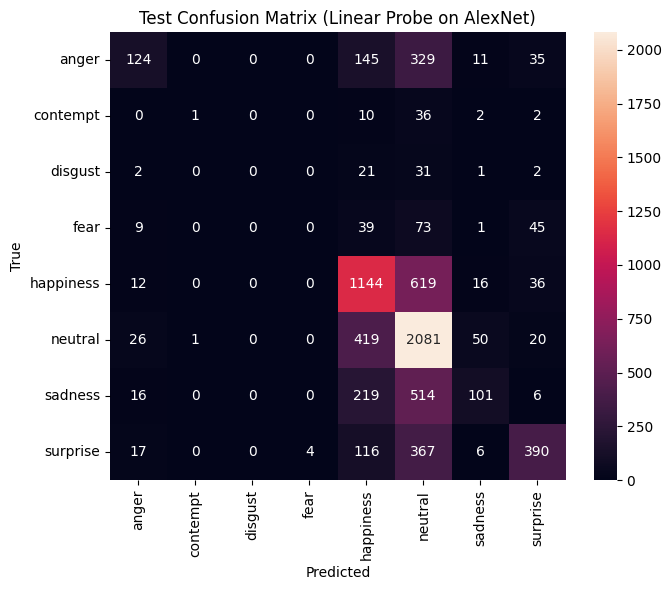

In [ ]:
#type 1

# ==== AlexNet Linear Probe (freeze backbone; train last layer only) ====
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import alexnet, AlexNet_Weights
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
import copy
import math

# 0) Class names from the Keras generator
#    Keras maps classes alphabetically: class_indices = {'anger':0, 'disgust':1, ...}
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
num_classes = len(class_indices)
print("Classes:", [idx_to_class[i] for i in range(num_classes)])

# 1) Torch device + AlexNet (pretrained). We'll freeze everything except the final layer.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

base_model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
# Freeze all backbone weights
for p in base_model.parameters():
    p.requires_grad = False

# Replace the final classifier layer to match your classes (trainable)
# Original classifier: [Dropout, Linear(9216->4096), ReLU, Dropout, Linear(4096->4096), ReLU, Linear(4096->1000)]
in_features = base_model.classifier[-1].in_features
base_model.classifier[-1] = nn.Linear(in_features, num_classes)  # only this layer has requires_grad=True
model = base_model.to(device).train()

# ImageNet normalization (Keras generator already did rescale=1/255)
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=device).view(1,3,1,1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=device).view(1,3,1,1)

# 2) Mini utilities to read batches from Keras generators into Torch
def keras_gen_to_torch_batches(gen, desc):
    """
    Iterate exactly one 'epoch' over a Keras DirectoryIterator.
    Yields (x_torch, y_idx) with ImageNet normalization applied.
    """
    gen.reset()
    steps = len(gen)
    for _ in tqdm(range(steps), desc=desc):
        X_np, y_np = next(gen)                         # X: (B,H,W,3) in [0,1], y one-hot (B,C)
        y_idx = np.argmax(y_np, axis=1).astype("int64")
        x = torch.from_numpy(X_np).permute(0,3,1,2).to(device)  # [B,3,H,W]
        x = (x - IMAGENET_MEAN) / IMAGENET_STD
        y = torch.from_numpy(y_idx).to(device)
        yield x, y

# 3) Training setup (linear probe: only final layer params are learnable)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[-1].parameters(), lr=1e-3, weight_decay=0.0)
# Optional: a cosine or step LR scheduler (kept simple here)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# 4) Train/eval loops
def run_split(model, gen, split_name="val"):
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for x, y in keras_gen_to_torch_batches(gen, desc=f"Eval ({split_name})"):
            logits = model(x)
            preds = logits.argmax(dim=1)
            all_preds.append(preds.detach().cpu().numpy())
            all_targets.append(y.detach().cpu().numpy())
    y_true = np.concatenate(all_targets) if all_targets else np.array([], dtype=np.int64)
    y_pred = np.concatenate(all_preds)   if all_preds   else np.array([], dtype=np.int64)
    acc = accuracy_score(y_true, y_pred) if y_true.size > 0 else float("nan")
    return acc, y_true, y_pred

def train_linear_probe(model, epochs=10, eval_every=1):
    best_w = copy.deepcopy(model.state_dict())
    best_val_acc = -1.0
    history = []

    for epoch in range(1, epochs+1):
        model.train()  # only final layer has grads
        running_loss, running_correct, running_total = 0.0, 0, 0

        for x, y in keras_gen_to_torch_batches(train_gen, desc=f"Train (epoch {epoch}/{epochs})"):
            optimizer.zero_grad()
            logits = model(x)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                running_loss += loss.item() * y.size(0)
                preds = logits.argmax(dim=1)
                running_correct += (preds == y).sum().item()
                running_total += y.size(0)

        train_loss = running_loss / max(1, running_total)
        train_acc = running_correct / max(1, running_total)

        # Evaluate
        if epoch % eval_every == 0:
            val_acc, y_true_val, y_pred_val = run_split(model, val_gen, split_name="val")
            # Use val loss proxy via acc (scheduler expects a 'loss'; invert acc)
            scheduler.step(1.0 - val_acc)
            history.append((epoch, train_loss, train_acc, val_acc))
            print(f"[Epoch {epoch}] Train Loss: {train_loss:.4f}  Train Acc: {train_acc:.4f}  Val Acc: {val_acc:.4f}")

            # Track best weights
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_w = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_w)
    print(f"Best Val Acc: {best_val_acc:.4f}")
    return history

# 5) Kick off training
history = train_linear_probe(model, epochs=10, eval_every=1)

# 6) Final evaluation on Validation and Test (reports + confusion matrices)
def eval_and_plot(name, gen):
    acc, y_true, y_pred = run_split(model, gen, split_name=name)
    print(f"\n{name} Accuracy: {acc:.4f}")
    # Restrict to classes present in y_true (in case of filtered subsets)
    present_labels = sorted(set(y_true.tolist())) if y_true.size else list(range(num_classes))
    target_names = [idx_to_class[i] for i in present_labels]
    print(f"{name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=present_labels)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=[idx_to_class[i] for i in present_labels],
                yticklabels=[idx_to_class[i] for i in present_labels])
    plt.title(f"{name} Confusion Matrix (Linear Probe on AlexNet)")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()

eval_and_plot("Validation", val_gen)
eval_and_plot("Test",       test_gen)


Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
Device: cuda
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 230MB/s]
Extracting (test): 100%|██████████| 111/111 [00:06<00:00, 17.13it/s]


Train features: (22712, 9216)  Val: (5674, 9216)  Test: (7099, 9216)

Validation Accuracy: 0.5649
Validation Classification Report:
              precision    recall  f1-score   support

       anger     0.3506    0.4260    0.3846       493
    contempt     0.1000    0.0303    0.0465        33
     disgust     0.0000    0.0000    0.0000        38
        fear     0.3088    0.3231    0.3158       130
   happiness     0.6246    0.6777    0.6501      1505
     neutral     0.6222    0.6114    0.6167      2061
     sadness     0.3754    0.3305    0.3515       702
    surprise     0.6864    0.6180    0.6504       712

    accuracy                         0.5649      5674
   macro avg     0.3835    0.3771    0.3770      5674
weighted avg     0.5624    0.5649    0.5625      5674



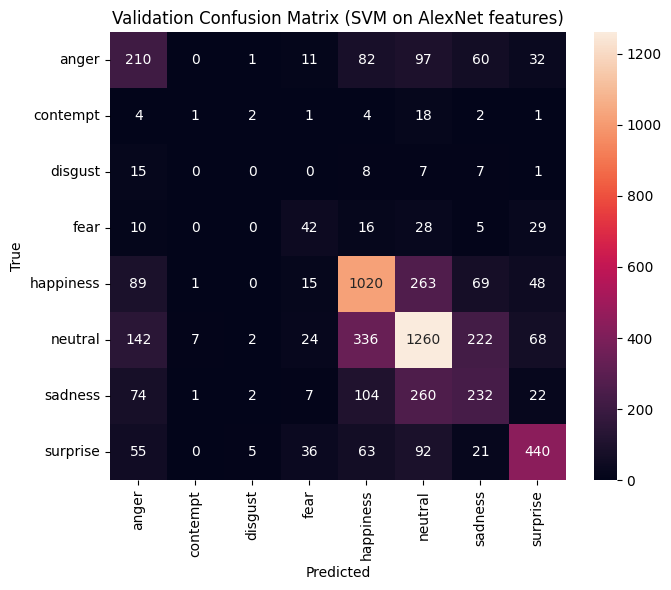


Test Accuracy: 0.6050
Test Classification Report:
              precision    recall  f1-score   support

       anger     0.4253    0.5481    0.4790       644
    contempt     0.1250    0.0196    0.0339        51
     disgust     0.5833    0.1228    0.2029        57
        fear     0.4737    0.2156    0.2963       167
   happiness     0.7004    0.6886    0.6945      1827
     neutral     0.6375    0.6920    0.6636      2597
     sadness     0.3626    0.3084    0.3333       856
    surprise     0.6976    0.6433    0.6694       900

    accuracy                         0.6050      7099
   macro avg     0.5007    0.4048    0.4216      7099
weighted avg     0.6009    0.6050    0.5988      7099



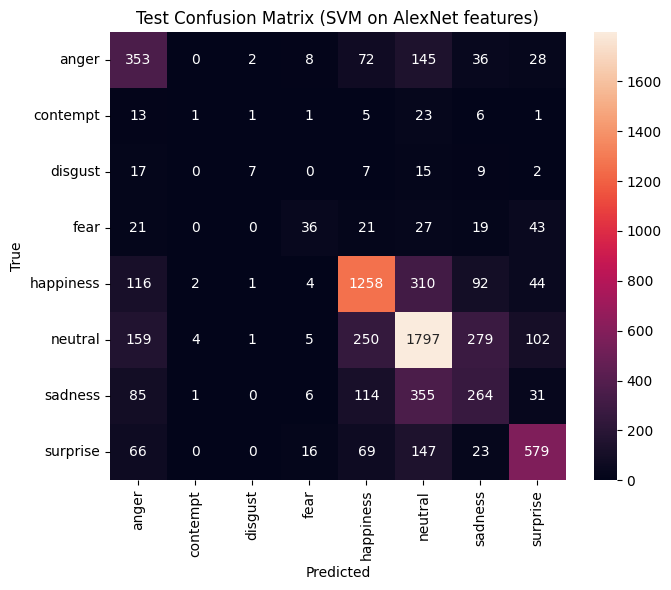

In [ ]:
##type 2


# ==== AlexNet feature extraction + SVM classifier (uses train_gen / val_gen / test_gen) ====
import numpy as np
import torch
import torch.nn as nn
from torchvision.models import alexnet, AlexNet_Weights
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 0) Class names from the Keras generator
#    Keras maps classes alphabetically: class_indices = {'anger':0, 'disgust':1, ...}
class_indices = train_gen.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
num_classes = len(class_indices)
print("Classes:", [idx_to_class[i] for i in range(num_classes)])

# 1) Torch device + AlexNet (pretrained) as a pure feature extractor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)




_alex = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)  # pretrained on ImageNet
feature_extractor = nn.Sequential(
    _alex.features,   # conv blocks
    _alex.avgpool,    # -> [N, 256, 6, 6]
    nn.Flatten()      # -> [N, 9216]
).to(device).eval()

# ImageNet normalization (Keras generator already did rescale=1/255)
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=device).view(1,3,1,1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=device).view(1,3,1,1)

def extract_features_from_generator(gen):
    """
    Loop exactly one 'epoch' of the DirectoryIterator.
    Keras yields RGB float32 in [0,1] due to rescale=1/255.
    We convert to Torch, normalize by ImageNet mean/std, and run AlexNet.
    Returns: X (N, 9216), y (N,)
    """
    gen.reset()
    feats_list, labels_list = [], []

    # len(gen) = number of batches per epoch
    for _ in tqdm(range(len(gen)), desc=f"Extracting ({gen.subset or 'test'})"):
        X_np, y_np = next(gen)                       # X: (B,H,W,3) float32 in [0,1]; y: one-hot (B,num_classes)
        y_idx = np.argmax(y_np, axis=1).astype("int64")

        # to torch [B,3,224,224]
        x = torch.from_numpy(X_np).permute(0,3,1,2).to(device)
        # normalize for ImageNet
        x = (x - IMAGENET_MEAN) / IMAGENET_STD

        with torch.no_grad():
            f = feature_extractor(x).detach().cpu().numpy()  # (B, 9216)

        feats_list.append(f)
        labels_list.append(y_idx)

    X = np.vstack(feats_list) if feats_list else np.empty((0, 9216), dtype=np.float32)
    y = np.concatenate(labels_list) if labels_list else np.empty((0,), dtype=np.int64)
    return X, y

# 2) Build (X, y) for train / val / test
X_train, y_train = extract_features_from_generator(train_gen)
X_val,   y_val   = extract_features_from_generator(val_gen)
X_test,  y_test  = extract_features_from_generator(test_gen)

print("Train features:", X_train.shape, " Val:", X_val.shape, " Test:", X_test.shape)

# 3) SVM classifier (with feature scaling)
svm = make_pipeline(
    StandardScaler(with_mean=True, with_std=True),
    SVC(kernel="linear", C=1.0, class_weight="balanced", probability=False, random_state=42)
)
svm.fit(X_train, y_train)

# 4) Evaluate on validation AND test
def eval_split(name, X, y):
    y_pred = svm.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    target_names = [idx_to_class[i] for i in sorted(set(y))]
    print(f"{name} Classification Report:")
    print(classification_report(y, y_pred, target_names=target_names, digits=4))

    cm = confusion_matrix(y, y_pred, labels=sorted(set(y)))
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=[idx_to_class[i] for i in sorted(set(y))],
                yticklabels=[idx_to_class[i] for i in sorted(set(y))])
    plt.title(f"{name} Confusion Matrix (SVM on AlexNet features)")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()

eval_split("Validation", X_val, y_val)
eval_split("Test",       X_test, y_test)


In [ ]:
# ==== Export AlexNet+SVM artifacts for local inference (Colab) ====
import os, json, zipfile, joblib, torch, gc
from sklearn import __version__ as sklearn_version
import torch.nn as nn
from torchvision.models import alexnet, AlexNet_Weights

# Folder for artifacts
ARTI = "/content/alexnet_svm_artifacts"
os.makedirs(ARTI, exist_ok=True)

# 1) Save the trained SVM pipeline (StandardScaler + SVC)
svm_path = os.path.join(ARTI, "svm_alexnet_pipeline.joblib")
joblib.dump(svm, svm_path, compress=3)
print("Saved:", svm_path)

# 2) Save class names in the exact index order used
class_names = [idx_to_class[i] for i in range(num_classes)]
with open(os.path.join(ARTI, "classes.json"), "w") as f:
    json.dump({"class_names": class_names}, f, indent=2)
print("Saved:", os.path.join(ARTI, "classes.json"))

# 3) Save a TorchScript feature extractor so local code doesn't re-download weights
#    (AlexNet pretrained on ImageNet, same as used for feature extraction: features+avgpool+Flatten -> 9216-D)
alex_cpu = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
feature_extractor_cpu = nn.Sequential(
    alex_cpu.features,
    alex_cpu.avgpool,
    nn.Flatten()
).eval()  # CPU + eval

ts_path = os.path.join(ARTI, "alexnet_features_scripted.pt")
try:
    scripted = torch.jit.script(feature_extractor_cpu)
    scripted.save(ts_path)
    print("Saved TorchScript (script):", ts_path)
except Exception as e:
    print("Scripting failed, falling back to trace:", e)
    example = torch.randn(1, 3, 224, 224)
    traced = torch.jit.trace(feature_extractor_cpu, example)
    traced.save(ts_path)
    print("Saved TorchScript (trace):", ts_path)

# Free RAM
del alex_cpu, feature_extractor_cpu
gc.collect(); torch.cuda.empty_cache() if torch.cuda.is_available() else None

# 4) Save metadata describing preprocessing and model setup
meta = {
    "pipeline": "alexnet_features + StandardScaler + SVC",
    "arch": "alexnet",
    "feature_dim": 9216,
    "input_size": [3, 224, 224],
    "imagenet_mean": [0.485, 0.456, 0.406],
    "imagenet_std":  [0.229, 0.224, 0.225],
    "svm": {
        "sklearn_version": sklearn_version,
        "kernel": "linear",
        "C": 1.0,
        "class_weight": "balanced",
        "probability": False,
        "random_state": 42
    },
    "notes": "Keras generator rescaled images to [0,1]; local inference must do the same then normalize with mean/std above."
}
with open(os.path.join(ARTI, "meta.json"), "w") as f:
    json.dump(meta, f, indent=2)
print("Saved:", os.path.join(ARTI, "meta.json"))

# 5) Zip and download
zip_path = "/content/alexnet_svm_artifacts.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for name in os.listdir(ARTI):
        z.write(os.path.join(ARTI, name), arcname=name)
print("Bundle:", zip_path)

from google.colab import files
files.download(zip_path)


Saved: /content/alexnet_svm_artifacts/svm_alexnet_pipeline.joblib
Saved: /content/alexnet_svm_artifacts/classes.json
Saved TorchScript (script): /content/alexnet_svm_artifacts/alexnet_features_scripted.pt
Saved: /content/alexnet_svm_artifacts/meta.json
Bundle: /content/alexnet_svm_artifacts.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Device: cuda | Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 215MB/s]


Epoch 1/20 | Batch 0/355 | Loss 2.1631
Epoch 1/20 | Batch 100/355 | Loss 1.1243
Epoch 1/20 | Batch 200/355 | Loss 1.1681
Epoch 1/20 | Batch 300/355 | Loss 0.9626
Epoch 01 | Train Loss 1.2049 Acc 61.25% | Val Loss 1.0368 Acc 68.38%
✓ Saved: alexnet_finetuned_best.pth
Epoch 2/20 | Batch 0/355 | Loss 0.9137
Epoch 2/20 | Batch 100/355 | Loss 1.0185
Epoch 2/20 | Batch 200/355 | Loss 1.0275
Epoch 2/20 | Batch 300/355 | Loss 0.7798
Epoch 02 | Train Loss 0.9756 Acc 71.07% | Val Loss 0.9296 Acc 72.54%
✓ Saved: alexnet_finetuned_best.pth
Epoch 3/20 | Batch 0/355 | Loss 1.0416
Epoch 3/20 | Batch 100/355 | Loss 0.7518
Epoch 3/20 | Batch 200/355 | Loss 0.8342
Epoch 3/20 | Batch 300/355 | Loss 0.9531
Epoch 03 | Train Loss 0.9034 Acc 74.01% | Val Loss 0.8688 Acc 74.92%
✓ Saved: alexnet_finetuned_best.pth
Epoch 4/20 | Batch 0/355 | Loss 0.8200
Epoch 4/20 | Batch 100/355 | Loss 0.8662
Epoch 4/20 | Batch 200/355 | Loss 0.7781
Epoch 4/20 | Batch 300/355 | Loss 0.9259
Epoch 04 | Train Loss 0.8385 Acc 76.5

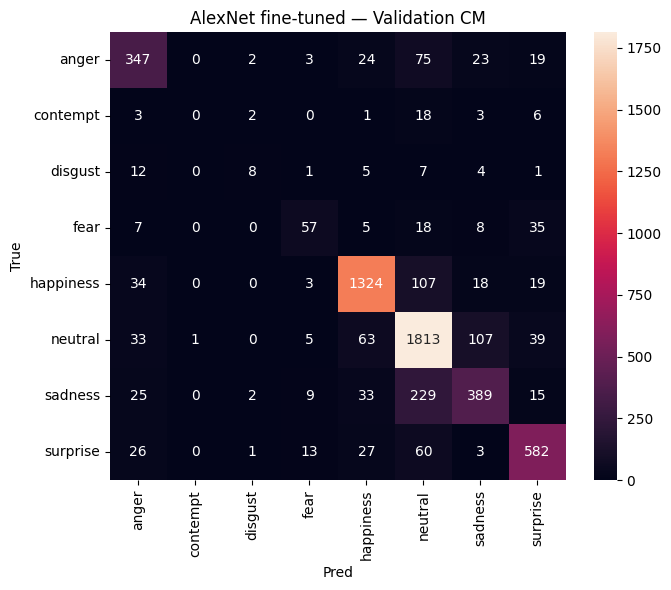


TEST | loss 0.7546 acc 79.86%
              precision    recall  f1-score   support

       anger     0.7410    0.7329    0.7369       644
    contempt     0.0000    0.0000    0.0000        51
     disgust     0.5000    0.2456    0.3294        57
        fear     0.5946    0.3952    0.4748       167
   happiness     0.8998    0.8949    0.8974      1827
     neutral     0.7922    0.8645    0.8267      2597
     sadness     0.6210    0.6145    0.6177       856
    surprise     0.8618    0.7900    0.8243       900

    accuracy                         0.7986      7099
   macro avg     0.6263    0.5672    0.5884      7099
weighted avg     0.7907    0.7986    0.7931      7099



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


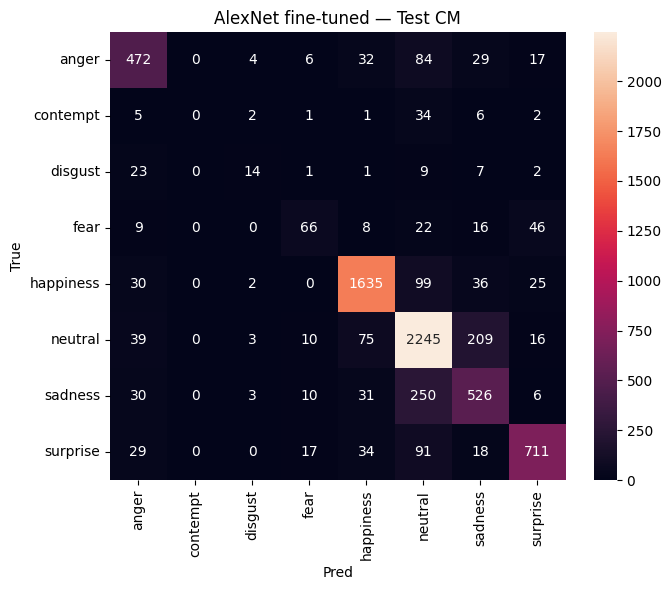

In [ ]:
#----type 3


# ==== AlexNet fine-tuning (end-to-end) on FERPlus using Keras generators ====
import numpy as np, torch, torch.nn as nn, torch.optim as optim, matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.models import alexnet, AlexNet_Weights
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# 0) Classes / device
class_indices = train_gen.class_indices                 # {'anger':0, 'contempt':1, ...}
idx_to_class  = {v:k for k,v in class_indices.items()}
class_names   = [idx_to_class[i] for i in range(len(class_indices))]
num_classes   = len(class_indices)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| Classes:", class_names)

# 1) Build AlexNet and replace final classifier head
model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
# AlexNet classifier = [Dropout, Linear(9216->4096), ReLU, Dropout, Linear(4096->4096), ReLU, Linear(4096->1000)]
in_features = model.classifier[6].in_features          # 4096
model.classifier[6] = nn.Linear(in_features, num_classes)
model = model.to(device)

# Optional: if you want to freeze early convs (uncomment next lines)
# for p in model.features.parameters():
#     p.requires_grad = False

# 2) Loss / optimizer / scheduler
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# 3) ImageNet normalization (your gens already rescale to [0,1])
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=device).view(1,3,1,1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=device).view(1,3,1,1)

def _batch_from_keras(X_np, y_np):
    # X_np: (B,H,W,3) float32 in [0,1], y_np: one-hot (B,C)
    x = torch.from_numpy(X_np).permute(0,3,1,2).to(device)
    x = (x - IMAGENET_MEAN) / IMAGENET_STD
    y = torch.from_numpy(np.argmax(y_np, axis=1)).long().to(device)
    return x, y

class KerasTorchLoader:
    def __init__(self, keras_gen):
        self.gen = keras_gen
        self._len = len(keras_gen)
    def __len__(self): return self._len
    def __iter__(self):
        self.gen.reset()
        for _ in range(self._len):
            X_np, y_np = next(self.gen)
            yield _batch_from_keras(X_np, y_np)

train_loader = KerasTorchLoader(train_gen)
val_loader   = KerasTorchLoader(val_gen)
test_loader  = KerasTorchLoader(test_gen)

@torch.no_grad()
def evaluate(loader, model):
    model.eval()
    total, correct, loss_sum = 0, 0, 0.0
    all_preds, all_labels = [], []
    for x,y in loader:
        out = model(x)
        loss = criterion(out, y)
        loss_sum += loss.item() * x.size(0)
        preds = out.argmax(1)
        correct += (preds == y).sum().item()
        total   += y.size(0)
        all_preds.append(preds.cpu().numpy())
        all_labels.append(y.cpu().numpy())
    avg_loss = loss_sum / max(1,total)
    acc = correct / max(1,total)
    all_preds  = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return avg_loss, acc, all_labels, all_preds

def train_model(model, epochs=20, patience=3, print_every=100):
    best_val_loss = float('inf')
    wait = 0
    history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}
    best_state = None

    for ep in range(1, epochs+1):
        # ---- Train ----
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for b,(x,y) in enumerate(train_loader):
            optimizer.zero_grad(set_to_none=True)
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            correct += (out.argmax(1) == y).sum().item()
            total   += y.size(0)
            if b % print_every == 0:
                print(f"Epoch {ep}/{epochs} | Batch {b}/{len(train_loader)} | Loss {loss.item():.4f}")

        scheduler.step()
        train_loss = running_loss / max(1,len(train_loader))
        train_acc  = correct / max(1,total)

        # ---- Validate ----
        val_loss, val_acc, _, _ = evaluate(val_loader, model)

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"Epoch {ep:02d} | Train Loss {train_loss:.4f} Acc {train_acc*100:.2f}% "
              f"| Val Loss {val_loss:.4f} Acc {val_acc*100:.2f}%")

        # early stopping on val loss
        if val_loss < best_val_loss - 1e-4:
            best_val_loss = val_loss
            wait = 0
            best_state = {k:v.detach().cpu().clone() for k,v in model.state_dict().items()}
            torch.save({
                "epoch": ep,
                "model_state_dict": best_state,
                "optimizer_state_dict": optimizer.state_dict(),
                "class_names": class_names
            }, "alexnet_finetuned_best.pth")
            print("✓ Saved: alexnet_finetuned_best.pth")
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping — restoring best weights.")
                break

    if best_state is not None:
        model.load_state_dict(best_state)
    return history

# ---- Train ----
history = train_model(model, epochs=20, patience=3)

# ---- Evaluate on validation & test ----
val_loss, val_acc, yv, pv = evaluate(val_loader, model)
print(f"\nVAL  | loss {val_loss:.4f} acc {val_acc*100:.2f}%")
print(classification_report(yv, pv, target_names=class_names, digits=4))
cmv = confusion_matrix(yv, pv)
plt.figure(figsize=(7,6)); sns.heatmap(cmv, annot=True, fmt="d",
    xticklabels=class_names, yticklabels=class_names)
plt.title("AlexNet fine-tuned — Validation CM"); plt.xlabel("Pred"); plt.ylabel("True"); plt.tight_layout(); plt.show()

test_loss, test_acc, yt, pt = evaluate(test_loader, model)
print(f"\nTEST | loss {test_loss:.4f} acc {test_acc*100:.2f}%")
print(classification_report(yt, pt, target_names=class_names, digits=4))
cmt = confusion_matrix(yt, pt)
plt.figure(figsize=(7,6)); sns.heatmap(cmt, annot=True, fmt="d",
    xticklabels=class_names, yticklabels=class_names)
plt.title("AlexNet fine-tuned — Test CM"); plt.xlabel("Pred"); plt.ylabel("True"); plt.tight_layout(); plt.show()


In [ ]:
# ==== Export fine-tuned AlexNet artifacts for local webcam inference ====
import os, json, zipfile, torch, gc
from google.colab import files

ARTI = "/content/alexnet_finetuned_artifacts"
os.makedirs(ARTI, exist_ok=True)

# 1) Save full training checkpoint (best already saved during training)
best_ckpt_path = os.path.join(ARTI, "alexnet_finetuned_best.pth")
if os.path.exists("alexnet_finetuned_best.pth"):
    torch.save(torch.load("alexnet_finetuned_best.pth", map_location="cpu"), best_ckpt_path)
else:
    # Save current state as a fallback
    torch.save({
        "epoch": -1,
        "model_state_dict": model.state_dict(),
        "class_names": class_names
    }, best_ckpt_path)
print("Saved:", best_ckpt_path)

# 2) Save TorchScript inference model (forward logits)
model_cpu = alexnet(weights=None)
in_features = model_cpu.classifier[6].in_features
model_cpu.classifier[6] = nn.Linear(in_features, num_classes)
# load best weights
state = torch.load(best_ckpt_path, map_location="cpu")
state_dict = state["model_state_dict"] if "model_state_dict" in state else state
model_cpu.load_state_dict(state_dict, strict=True)
model_cpu.eval()

ts_path = os.path.join(ARTI, "alexnet_finetuned_scripted.pt")
try:
    scripted = torch.jit.script(model_cpu)
    scripted.save(ts_path)
    print("Saved TorchScript (script):", ts_path)
except Exception as e:
    print("Scripting failed, falling back to trace:", e)
    example = torch.randn(1,3,224,224)
    traced = torch.jit.trace(model_cpu, example)
    traced.save(ts_path)
    print("Saved TorchScript (trace):", ts_path)

# 3) Save class names
with open(os.path.join(ARTI, "classes.json"), "w") as f:
    json.dump({"class_names": class_names}, f, indent=2)
print("Saved classes.json")

# 4) Save preprocessing meta
meta = {
    "pipeline": "alexnet finetuned softmax",
    "arch": "alexnet",
    "input_size": [3,224,224],
    "imagenet_mean": [0.485, 0.456, 0.406],
    "imagenet_std":  [0.229, 0.224, 0.225],
    "notes": "Inputs must be RGB float in [0,1], then normalized with mean/std above."
}
with open(os.path.join(ARTI, "meta.json"), "w") as f:
    json.dump(meta, f, indent=2)
print("Saved meta.json")

# 5) Bundle for download
zip_path = "/content/alexnet_finetuned_artifacts.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for name in os.listdir(ARTI):
        z.write(os.path.join(ARTI, name), arcname=name)
print("Bundle:", zip_path)
files.download(zip_path)

# Cleanup
del model_cpu; gc.collect()


Saved: /content/alexnet_finetuned_artifacts/alexnet_finetuned_best.pth
Saved TorchScript (script): /content/alexnet_finetuned_artifacts/alexnet_finetuned_scripted.pt
Saved classes.json
Saved meta.json
Bundle: /content/alexnet_finetuned_artifacts.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

411

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Device: cuda | Classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']


Embedding: 100%|██████████| 355/355 [03:51<00:00,  1.53it/s]


Saved cache: ./alexnet_finetuned_cache/train_embeds.npz


Embedding: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Saved cache: ./alexnet_finetuned_cache/val_embeds.npz


Embedding: 100%|██████████| 111/111 [00:06<00:00, 16.65it/s]


Saved cache: ./alexnet_finetuned_cache/test_embeds.npz
Embeddings: (22712, 4096) (5674, 4096) (7099, 4096)

Training Linear SVM on 4096-D embeddings...
Linear SVM — VAL Accuracy: 0.7406

Training Logistic Regression on 4096-D embeddings...
Logistic Regression — VAL Accuracy: 0.7328

Training k-NN (k=15) on 4096-D embeddings...
k-NN (k=15) — VAL Accuracy: 0.7804

Training Random Forest on 4096-D embeddings...
Random Forest — VAL Accuracy: 0.7943

Best on VAL: Random Forest (0.7943)

Linear SVM (VAL) Accuracy: 0.7406
              precision    recall  f1-score   support

       anger     0.5778    0.6856    0.6271       493
    contempt     0.0690    0.0606    0.0645        33
     disgust     0.3529    0.3158    0.3333        38
        fear     0.4333    0.5000    0.4643       130
   happiness     0.8489    0.8625    0.8556      1505
     neutral     0.7750    0.7555    0.7651      2061
     sadness     0.5695    0.5484    0.5588       702
    surprise     0.8233    0.7654    0.7933   

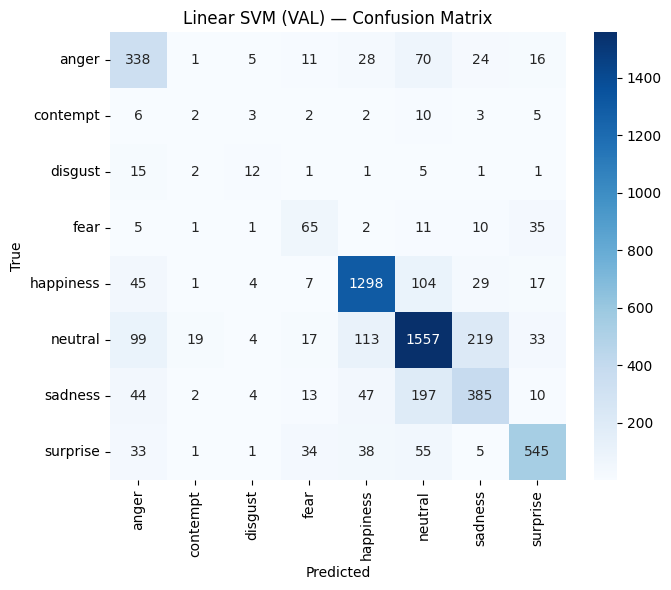


Linear SVM (TEST) Accuracy: 0.7487
              precision    recall  f1-score   support

       anger     0.6178    0.7205    0.6652       644
    contempt     0.2500    0.1961    0.2198        51
     disgust     0.3846    0.3509    0.3670        57
        fear     0.4800    0.4311    0.4543       167
   happiness     0.8744    0.8763    0.8753      1827
     neutral     0.7766    0.7682    0.7724      2597
     sadness     0.5186    0.5537    0.5356       856
    surprise     0.8573    0.7544    0.8026       900

    accuracy                         0.7487      7099
   macro avg     0.5949    0.5814    0.5865      7099
weighted avg     0.7526    0.7487    0.7497      7099



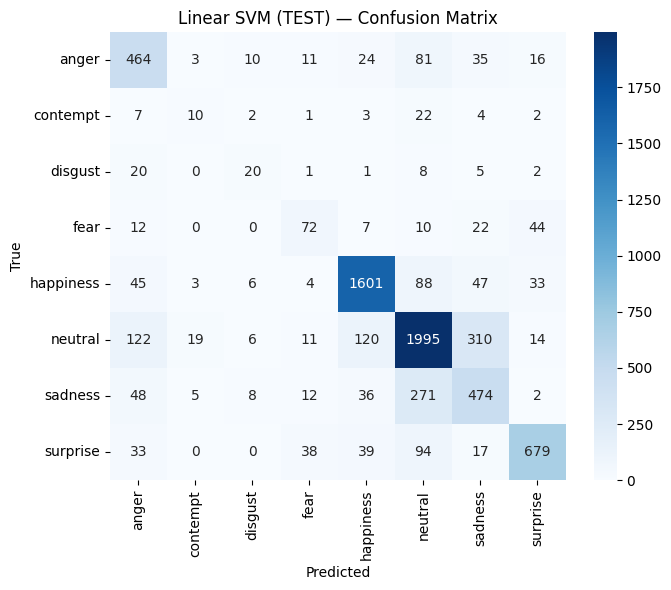


Logistic Regression (VAL) Accuracy: 0.7328
              precision    recall  f1-score   support

       anger     0.6004    0.6187    0.6094       493
    contempt     0.1429    0.1515    0.1471        33
     disgust     0.3250    0.3421    0.3333        38
        fear     0.4435    0.4231    0.4331       130
   happiness     0.8685    0.8425    0.8553      1505
     neutral     0.7717    0.7496    0.7605      2061
     sadness     0.5198    0.5798    0.5481       702
    surprise     0.7756    0.7865    0.7810       712

    accuracy                         0.7328      5674
   macro avg     0.5559    0.5617    0.5585      5674
weighted avg     0.7377    0.7328    0.7349      5674



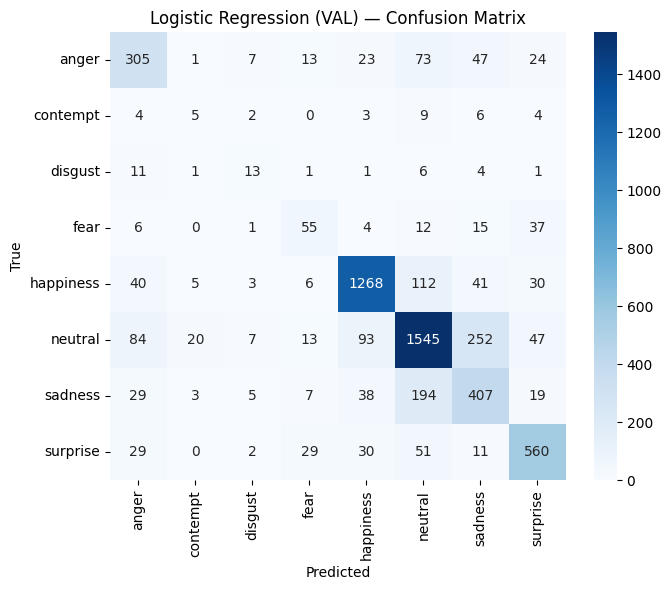


Logistic Regression (TEST) Accuracy: 0.7373
              precision    recall  f1-score   support

       anger     0.6165    0.6863    0.6495       644
    contempt     0.1356    0.1569    0.1455        51
     disgust     0.3800    0.3333    0.3551        57
        fear     0.4963    0.4012    0.4437       167
   happiness     0.8874    0.8500    0.8683      1827
     neutral     0.7778    0.7547    0.7661      2597
     sadness     0.4866    0.5724    0.5260       856
    surprise     0.8072    0.7722    0.7893       900

    accuracy                         0.7373      7099
   macro avg     0.5734    0.5659    0.5679      7099
weighted avg     0.7456    0.7373    0.7405      7099



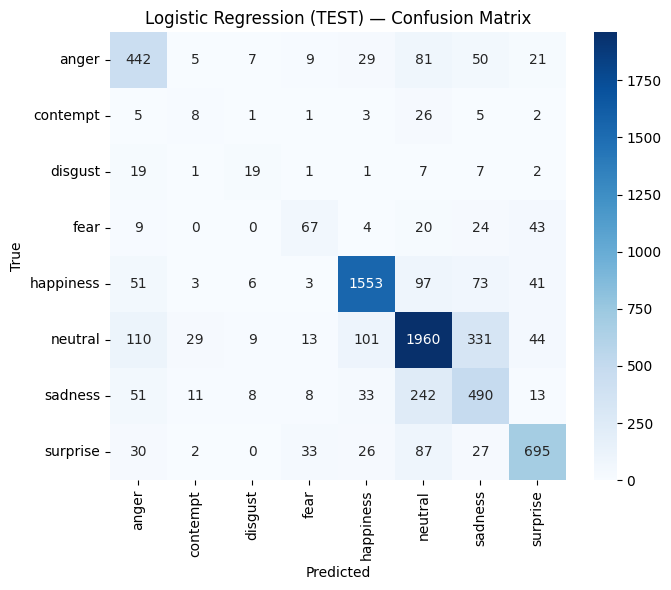


k-NN (k=15) (VAL) Accuracy: 0.7804
              precision    recall  f1-score   support

       anger     0.7935    0.5923    0.6783       493
    contempt     0.0000    0.0000    0.0000        33
     disgust     0.5000    0.3158    0.3871        38
        fear     0.5361    0.4000    0.4581       130
   happiness     0.8657    0.8738    0.8697      1505
     neutral     0.7308    0.9180    0.8138      2061
     sadness     0.7366    0.4103    0.5270       702
    surprise     0.8411    0.8104    0.8255       712

    accuracy                         0.7804      5674
   macro avg     0.6255    0.5401    0.5699      5674
weighted avg     0.7763    0.7804    0.7671      5674



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


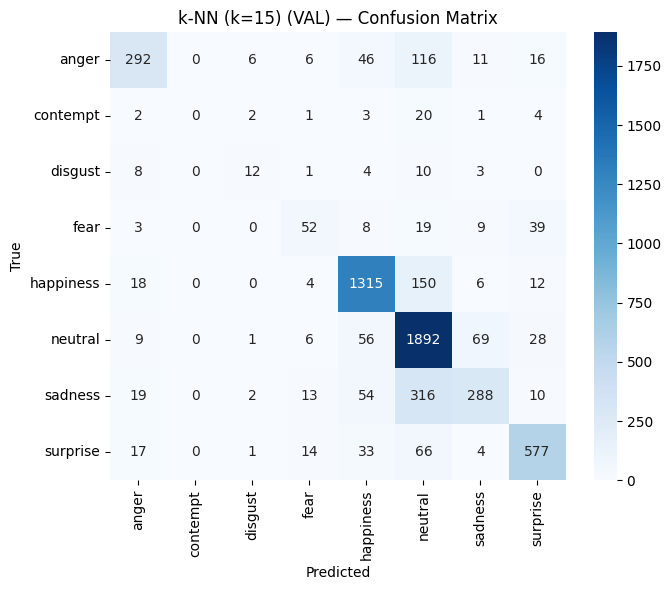


k-NN (k=15) (TEST) Accuracy: 0.7836
              precision    recall  f1-score   support

       anger     0.7867    0.6413    0.7066       644
    contempt     0.1667    0.0196    0.0351        51
     disgust     0.5172    0.2632    0.3488        57
        fear     0.5536    0.3713    0.4444       167
   happiness     0.8755    0.8966    0.8859      1827
     neutral     0.7393    0.9130    0.8170      2597
     sadness     0.6661    0.4404    0.5302       856
    surprise     0.8761    0.7622    0.8152       900

    accuracy                         0.7836      7099
   macro avg     0.6476    0.5384    0.5729      7099
weighted avg     0.7769    0.7836    0.7718      7099



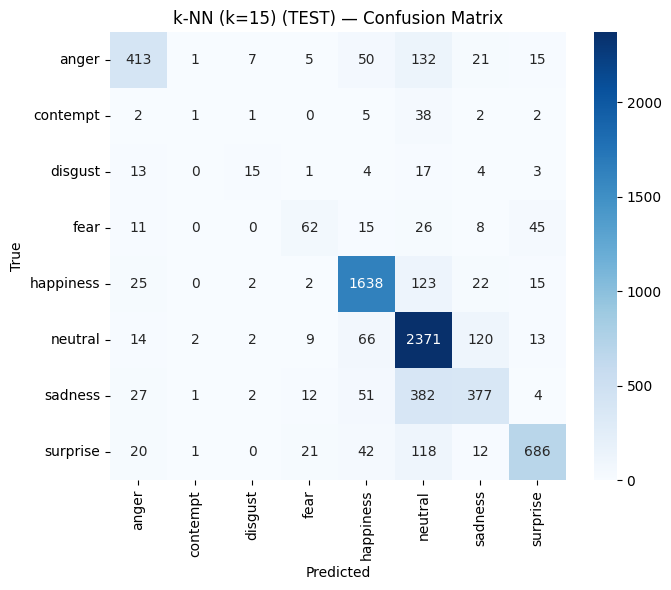


Random Forest (VAL) Accuracy: 0.7943
              precision    recall  f1-score   support

       anger     0.7095    0.6937    0.7015       493
    contempt     0.0000    0.0000    0.0000        33
     disgust     0.7500    0.2368    0.3600        38
        fear     0.6962    0.4231    0.5263       130
   happiness     0.8903    0.8738    0.8820      1505
     neutral     0.7567    0.8918    0.8187      2061
     sadness     0.7271    0.5085    0.5985       702
    surprise     0.8395    0.8301    0.8347       712

    accuracy                         0.7943      5674
   macro avg     0.6712    0.5572    0.5902      5674
weighted avg     0.7889    0.7943    0.7855      5674



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


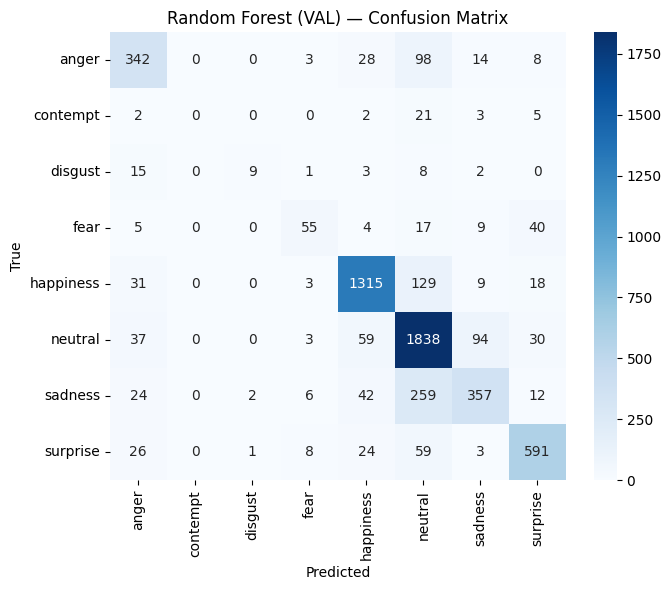


Random Forest (TEST) Accuracy: 0.7957
              precision    recall  f1-score   support

       anger     0.7310    0.7174    0.7241       644
    contempt     0.0000    0.0000    0.0000        51
     disgust     0.7059    0.2105    0.3243        57
        fear     0.6596    0.3713    0.4751       167
   happiness     0.9034    0.8856    0.8944      1827
     neutral     0.7653    0.8903    0.8231      2597
     sadness     0.6550    0.5479    0.5967       856
    surprise     0.8623    0.7933    0.8264       900

    accuracy                         0.7957      7099
   macro avg     0.6603    0.5520    0.5830      7099
weighted avg     0.7883    0.7957    0.7875      7099



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


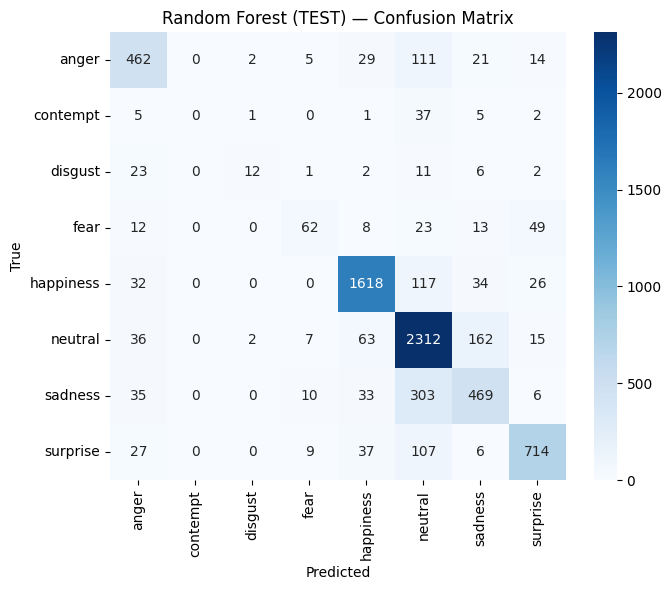

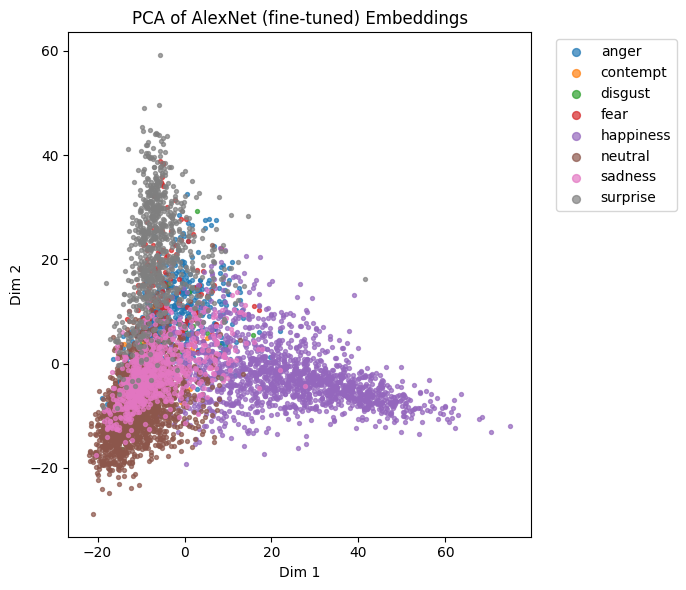

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


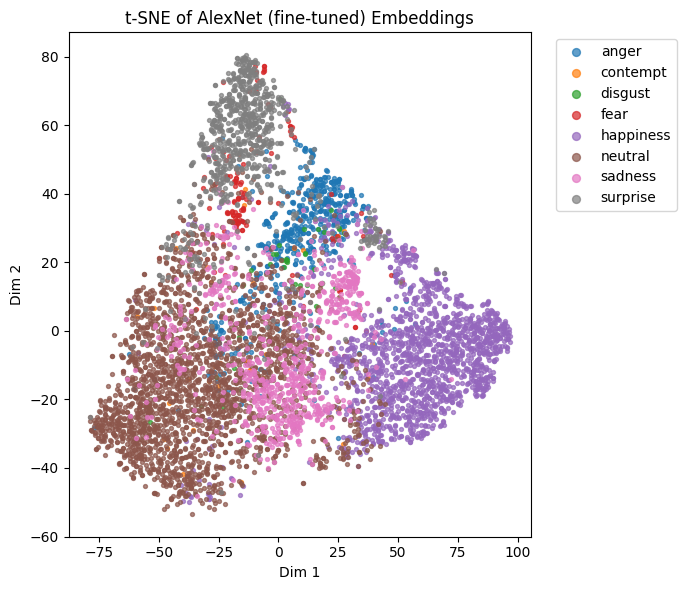

In [ ]:
# ===== Post-hoc embeddings from fine-tuned AlexNet + classical classifiers =====
# Uses your existing train_gen / val_gen / test_gen (Keras) and your best checkpoint.

import os, json, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm
import torch, torch.nn as nn

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from torchvision.models import alexnet, AlexNet_Weights
import seaborn as sns

# ------------------ 1) Setup / reuse class info from your gens ------------------
class_indices = train_gen.class_indices
idx_to_class = {v:k for k,v in class_indices.items()}
class_names = [idx_to_class[i] for i in range(len(class_indices))]
num_classes = len(class_names)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| Classes:", class_names)

# ImageNet normalization (your gens already rescale to [0,1])
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], device=device).view(1,3,1,1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225], device=device).view(1,3,1,1)

def _batch_from_keras(X_np, y_np):
    x = torch.from_numpy(X_np).permute(0,3,1,2).to(device)
    x = (x - IMAGENET_MEAN) / IMAGENET_STD
    y = torch.from_numpy(np.argmax(y_np, axis=1)).long().to(device)
    return x, y

class KerasTorchLoader:
    def __init__(self, keras_gen):
        self.gen = keras_gen
        self._len = len(keras_gen)
    def __len__(self): return self._len
    def __iter__(self):
        self.gen.reset()
        for _ in range(self._len):
            X_np, Y_np = next(self.gen)
            yield _batch_from_keras(X_np, Y_np)

train_loader = KerasTorchLoader(train_gen)
val_loader   = KerasTorchLoader(val_gen)
test_loader  = KerasTorchLoader(test_gen)

# ------------------ 2) Load fine-tuned AlexNet & build embedding head ------------------
# Load the exact architecture and replace final layer to match num_classes (as in training)
model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
in_features = model.classifier[6].in_features            # 4096
model.classifier[6] = nn.Linear(in_features, num_classes)
model = model.to(device)

# Load your best weights (update the path if needed)
BEST_CKPT = "/content/drive/MyDrive/alexnet_finetuned_artifacts/alexnet_finetuned_state.pth"
state = torch.load(BEST_CKPT, map_location=device)
state_dict = state["model_state_dict"] if "model_state_dict" in state else state
model.load_state_dict(state_dict, strict=True)
model.eval()

# Build an embedding extractor that stops BEFORE the final Linear
# AlexNet classifier = [0]Dropout, [1]Linear 9216->4096, [2]ReLU, [3]Dropout, [4]Linear 4096->4096, [5]ReLU, [6]Linear 4096->num_classes
# We'll take outputs after layer [5]ReLU -> 4096-D embeddings.
embedding_head = nn.Sequential(
    model.features,
    model.avgpool,
    nn.Flatten(),
    *list(model.classifier[:6])   # up to ReLU at index 5 (exclude final Linear)
).to(device).eval()

EMB_DIM = 4096

@torch.no_grad()
def extract_embeddings(loader):
    X_list, y_list = [], []
    for x, y in tqdm(loader, desc="Embedding"):
        f = embedding_head(x)                # [B, 4096]
        X_list.append(f.detach().cpu().numpy())
        y_list.append(y.detach().cpu().numpy())
    X = np.vstack(X_list) if X_list else np.empty((0, EMB_DIM), dtype=np.float32)
    y = np.concatenate(y_list) if y_list else np.empty((0,), dtype=np.int64)
    return X, y

# ------------------ 3) Cache embeddings so you don't redo forward passes ------------------
CACHE_DIR = "./alexnet_finetuned_cache"
os.makedirs(CACHE_DIR, exist_ok=True)

def load_or_build(cache_name, loader):
    path = os.path.join(CACHE_DIR, cache_name)
    if os.path.exists(path):
        d = np.load(path)
        print("Loaded cached:", path)
        return d["X"], d["y"]
    X, y = extract_embeddings(loader)
    np.savez_compressed(path, X=X, y=y)
    print("Saved cache:", path)
    return X, y

X_tr, y_tr = load_or_build("train_embeds.npz", train_loader)
X_va, y_va = load_or_build("val_embeds.npz",   val_loader)
X_te, y_te = load_or_build("test_embeds.npz",  test_loader)

print("Embeddings:", X_tr.shape, X_va.shape, X_te.shape)

# ------------------ 4) Train multiple classifiers on embeddings ------------------
def eval_split(name, clf, X, y):
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y, y_pred, target_names=class_names, digits=4))
    cm = confusion_matrix(y, y_pred, labels=list(range(num_classes)))
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} — Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()

# Classifiers
clfs = {
    "Linear SVM": make_pipeline(
        StandardScaler(with_mean=True, with_std=True),
        SVC(kernel="linear", C=1.0, class_weight="balanced", probability=False, random_state=42)
    ),
    "Logistic Regression": make_pipeline(
        StandardScaler(with_mean=True, with_std=True),
        LogisticRegression(max_iter=2000, n_jobs=None, class_weight="balanced", solver="lbfgs")
    ),
    "k-NN (k=15)": make_pipeline(
        StandardScaler(with_mean=True, with_std=True),
        KNeighborsClassifier(n_neighbors=15, weights="distance")
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, class_weight="balanced_subsample", random_state=42
    ),
}

# Fit on TRAIN embeddings; pick best on VAL; then evaluate on TEST
val_scores = {}
for name, clf in clfs.items():
    print("\n" + "="*70)
    print(f"Training {name} on 4096-D embeddings...")
    clf.fit(X_tr, y_tr)
    val_acc = accuracy_score(y_va, clf.predict(X_va))
    val_scores[name] = val_acc
    print(f"{name} — VAL Accuracy: {val_acc:.4f}")

best_name = max(val_scores, key=val_scores.get)
best_clf = clfs[best_name]
print("\nBest on VAL:", best_name, f"({val_scores[best_name]:.4f})")

# Full evaluations
for name, clf in clfs.items():
    eval_split(f"{name} (VAL)",  clf, X_va, y_va)
    eval_split(f"{name} (TEST)", clf, X_te, y_te)

# ------------------ 5) 2-D visualizations: PCA & t-SNE ------------------
def plot_2d(X, y, title):
    plt.figure(figsize=(7,6))
    for i, cls in enumerate(class_names):
        idx = (y == i)
        plt.scatter(X[idx,0], X[idx,1], s=8, alpha=0.7, label=cls)
    plt.legend(markerscale=2, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(title); plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
    plt.tight_layout(); plt.show()

# Use a subsample for t-SNE if very large (for speed)
def maybe_subsample(X, y, max_points=5000, seed=1337):
    if X.shape[0] <= max_points: return X, y
    rng = np.random.default_rng(seed)
    idx = rng.choice(X.shape[0], size=max_points, replace=False)
    return X[idx], y[idx]

# Visualize TRAIN embeddings (most representative)
Xviz, yviz = maybe_subsample(X_tr, y_tr, max_points=6000)

# PCA
pca = PCA(n_components=2, random_state=1337)
X_pca = pca.fit_transform(Xviz)
plot_2d(X_pca, yviz, "PCA of AlexNet (fine-tuned) Embeddings")

# t-SNE (can take a bit)
tsne = TSNE(n_components=2, init="pca", learning_rate="auto", perplexity=35, n_iter=1500, random_state=1337)
X_tsne = tsne.fit_transform(Xviz)
plot_2d(X_tsne, yviz, "t-SNE of AlexNet (fine-tuned) Embeddings")


In [ ]:
#